# data preprocessing

In [15]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [16]:
data = pd.read_csv('C:/Users/shravanitipe/mapython/cardio_train.csv', delimiter=';')

In [17]:
print(data.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [18]:
print(data.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [19]:
# Fill or drop missing values if any 
data = data.dropna()

In [20]:
# 1. Data Preprocessing
data['age'] = (data['age'] / 365).astype(int) 



In [21]:
print(data.head())

   id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0    110     80            1     1      0   
1   1   55       1     156    85.0    140     90            3     1      0   
2   2   51       1     165    64.0    130     70            3     1      0   
3   3   48       2     169    82.0    150    100            1     1      0   
4   4   47       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [22]:
X = data.drop(columns=['id', 'cardio'])
y = data['cardio']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# data visualization

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

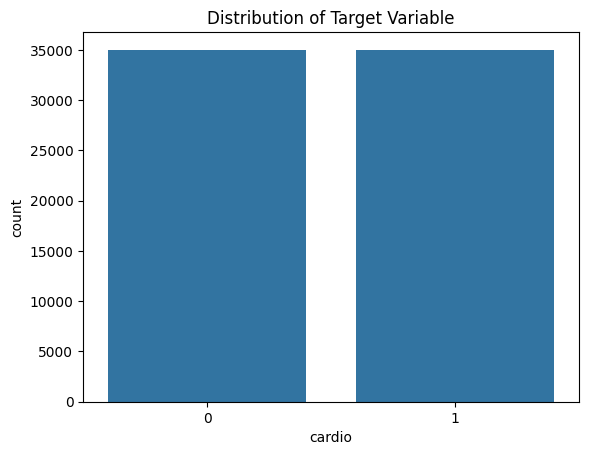

In [26]:
sns.countplot(x='cardio', data=data) 
plt.title('Distribution of Target Variable')
plt.show()

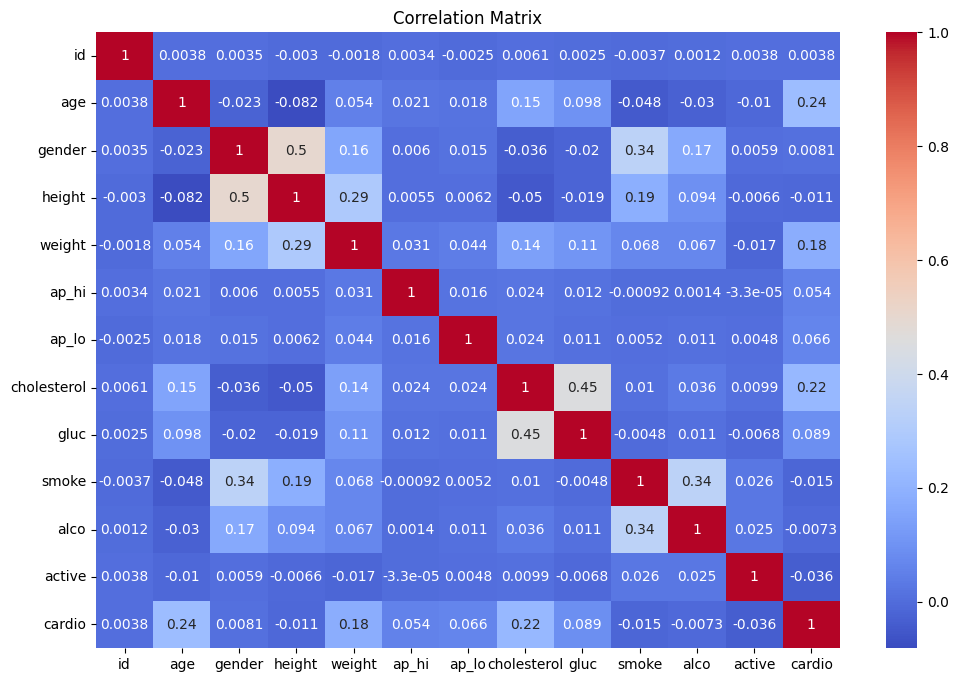

In [27]:
plt.figure(figsize=(12, 8)) 
correlation_matrix = data.corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.title('Correlation Matrix') 
plt.show()

In [28]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [29]:
models = { 'SVM': SVC(), 
          'KNN': KNeighborsClassifier(),
          'Decision Tree': DecisionTreeClassifier(), 
          'Logistic Regression': LogisticRegression(), 
          'Random Forest': RandomForestClassifier()
         }

In [30]:
for name, model in models.items(): 
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    accuracy = accuracy_score(y_test, y_pred) 
    print(f'{name} Accuracy: {accuracy:.2f}')

SVM Accuracy: 0.73
KNN Accuracy: 0.65
Decision Tree Accuracy: 0.64
Logistic Regression Accuracy: 0.72
Random Forest Accuracy: 0.71


In [31]:
# Assuming Random Forest gave the best accuracy
final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)

# Save the model
import joblib
joblib.dump(final_model, 'heart_disease_model.pkl')


['heart_disease_model.pkl']